In [3]:
import pandas as pd

# Cargar datasets
df1 = pd.read_csv("/content/ocean_data_all_coordinates.csv")
df2 = pd.read_csv("/content/yucatan_complete_sargassum_dataset.csv")


df1.describe()

,latitude,longitude,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction
count,305.000000,305.000000,146.000000,146.000000,146.000000
mean,19.985724,-87.982671,28.371849,1.420753,164.183288
std,0.880343,1.210721,0.750835,0.914305,101.126723
min,18.515185,-89.956649,26.110000,0.100000,4.100000
25%,19.218686,-89.039418,28.350000,0.685000,54.672500
50%,20.042703,-87.986331,28.585000,1.395000,182.615000
75%,20.739474,-86.924050,28.870000,2.015000,249.217500
max,21.470162,-86.001129,29.530000,3.930000,337.240000


In [4]:
df1.head()

,latitude,longitude,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,last_update_time
0,19.623620,-86.096592,28.91,1.19,246.66,2025-12-01T09:00
1,21.352143,-87.934799,NaN,NaN,NaN,2025-12-01T09:00
2,20.695982,-88.708174,NaN,NaN,NaN,2025-12-01T09:00
3,20.295975,-86.819255,28.56,1.43,254.81,2025-12-01T09:00
4,18.968056,-88.916671,NaN,NaN,NaN,2025-12-01T09:00


In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree

# Cargar tus dos datasets
dfA = pd.read_csv("/content/ocean_data_all_coordinates.csv")
dfB = pd.read_csv("/content/yucatan_complete_sargassum_dataset.csv")

# Detectar columnas de lat/lon si los nombres varían
latA = [c for c in dfA.columns if c.lower() in ["lat","latitude"]][0]
lonA = [c for c in dfA.columns if c.lower() in ["lon","longitude","long"]][0]

latB = [c for c in dfB.columns if c.lower() in ["lat","latitude"]][0]
lonB = [c for c in dfB.columns if c.lower() in ["lon","longitude","long"]][0]

# Renombrar ambas para sincronizar
dfA = dfA.rename(columns={latA: "lat", lonA: "lon"})
dfB = dfB.rename(columns={latB: "lat", lonB: "lon"})

# Convertir coordenadas en arreglos
coordsA = dfA[["lat", "lon"]].to_numpy()
coordsB = dfB[["lat", "lon"]].to_numpy()

# Construir árbol KD para coincidencias rápidas
tree = KDTree(coordsB)

# Buscar el punto más cercano
dist, idx = tree.query(coordsA, k=1)

# Definir tolerancia en grados
# 0.001º ≈ 110 metros → ajustable
tol = 0.001

mask = dist.flatten() <= tol

matched_A = dfA[mask].reset_index(drop=True)
matched_B = dfB.iloc[idx[mask].flatten()].reset_index(drop=True)

merged = pd.concat([matched_A, matched_B], axis=1)

# Guardar resultado final
merged.to_csv("/content/merged_sargassum_final.csv", index=False)

merged.head()


,lat,lon,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,last_update_time,date,lat,lon,sea_surface_temp,current_speed,current_direction,wind_speed,wind_direction,salinity,pH,dissolved_oxygen,chlorophyll_a,nitrate,sargassum_biomass
0,19.623620,-86.096592,28.91,1.19,246.66,2025-12-01T09:00,2020-01-06,19.623620,-86.096592,24.275185,0.710577,342.310882,4.594872,352.789319,36.670774,8.076856,6.906609,2.132796,0.153943,25.492700
1,21.352143,-87.934799,NaN,NaN,NaN,2025-12-01T09:00,2020-01-13,21.352143,-87.934799,29.595873,0.512252,54.380841,4.988221,216.677372,34.238220,8.070852,5.891492,4.882093,1.392312,25.063782
2,20.695982,-88.708174,NaN,NaN,NaN,2025-12-01T09:00,2020-01-20,20.695982,-88.708174,28.395303,1.427835,155.640528,5.302060,209.672157,36.194489,8.180951,3.734814,2.758484,0.765598,2.512150
3,20.295975,-86.819255,28.56,1.43,254.81,2025-12-01T09:00,2020-01-27,20.295975,-86.819255,24.572313,1.169048,339.701731,12.242363,269.306345,34.562236,8.216825,7.055619,2.945870,1.643662,1.745578
4,18.968056,-88.916671,NaN,NaN,NaN,2025-12-01T09:00,2020-02-03,18.968056,-88.916671,30.115050,0.296158,151.101834,8.548258,292.237124,36.574531,8.020221,6.179774,6.601885,1.319022,27.557998


In [6]:
ds = pd.read_csv("/content/merged_sargassum_final.csv")
ds.head()

,lat,lon,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,last_update_time,date,lat.1,lon.1,sea_surface_temp,current_speed,current_direction,wind_speed,wind_direction,salinity,pH,dissolved_oxygen,chlorophyll_a,nitrate,sargassum_biomass
0,19.623620,-86.096592,28.91,1.19,246.66,2025-12-01T09:00,2020-01-06,19.623620,-86.096592,24.275185,0.710577,342.310882,4.594872,352.789319,36.670774,8.076856,6.906609,2.132796,0.153943,25.492700
1,21.352143,-87.934799,NaN,NaN,NaN,2025-12-01T09:00,2020-01-13,21.352143,-87.934799,29.595873,0.512252,54.380841,4.988221,216.677372,34.238220,8.070852,5.891492,4.882093,1.392312,25.063782
2,20.695982,-88.708174,NaN,NaN,NaN,2025-12-01T09:00,2020-01-20,20.695982,-88.708174,28.395303,1.427835,155.640528,5.302060,209.672157,36.194489,8.180951,3.734814,2.758484,0.765598,2.512150
3,20.295975,-86.819255,28.56,1.43,254.81,2025-12-01T09:00,2020-01-27,20.295975,-86.819255,24.572313,1.169048,339.701731,12.242363,269.306345,34.562236,8.216825,7.055619,2.945870,1.643662,1.745578
4,18.968056,-88.916671,NaN,NaN,NaN,2025-12-01T09:00,2020-02-03,18.968056,-88.916671,30.115050,0.296158,151.101834,8.548258,292.237124,36.574531,8.020221,6.179774,6.601885,1.319022,27.557998


In [8]:
import pandas as pd



# Seleccionar SOLO las columnas que quieres
desired_columns = [
    "lat",
    "lon",
    "avg_sea_surface_temperature",
    "avg_ocean_current_velocity",
    "avg_ocean_current_direction",
    "sargassum_biomass"
]

df_filtered = ds[desired_columns]

# Guardar nuevo dataset limpio
df_filtered.to_csv("/content/dataset_final_ahorasi.csv", index=False)

df_filtered.head()


,lat,lon,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,sargassum_biomass
0,19.623620,-86.096592,28.91,1.19,246.66,25.492700
1,21.352143,-87.934799,NaN,NaN,NaN,25.063782
2,20.695982,-88.708174,NaN,NaN,NaN,2.512150
3,20.295975,-86.819255,28.56,1.43,254.81,1.745578
4,18.968056,-88.916671,NaN,NaN,NaN,27.557998


In [9]:
df = pd.read_csv("/content/dataset_final_ahorasi.csv")
df.head()

,lat,lon,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,sargassum_biomass
0,19.623620,-86.096592,28.91,1.19,246.66,25.492700
1,21.352143,-87.934799,NaN,NaN,NaN,25.063782
2,20.695982,-88.708174,NaN,NaN,NaN,2.512150
3,20.295975,-86.819255,28.56,1.43,254.81,1.745578
4,18.968056,-88.916671,NaN,NaN,NaN,27.557998


In [10]:
df.isnull().sum()

,0
lat,0
lon,0
avg_sea_surface_temperature,159
avg_ocean_current_velocity,159
avg_ocean_current_direction,159
sargassum_biomass,0


In [12]:
import pandas as pd
from sklearn.impute import KNNImputer



imputer = KNNImputer(n_neighbors=5)

cols = [
    "avg_sea_surface_temperature",
    "avg_ocean_current_velocity",
    "avg_ocean_current_direction"
]

df[cols] = imputer.fit_transform(df[cols])

df.head()


,lat,lon,avg_sea_surface_temperature,avg_ocean_current_velocity,avg_ocean_current_direction,sargassum_biomass
0,19.623620,-86.096592,28.910000,1.190000,246.660000,25.492700
1,21.352143,-87.934799,28.371849,1.420753,164.183288,25.063782
2,20.695982,-88.708174,28.371849,1.420753,164.183288,2.512150
3,20.295975,-86.819255,28.560000,1.430000,254.810000,1.745578
4,18.968056,-88.916671,28.371849,1.420753,164.183288,27.557998


In [13]:
df.isnull().sum()

,0
lat,0
lon,0
avg_sea_surface_temperature,0
avg_ocean_current_velocity,0
avg_ocean_current_direction,0
sargassum_biomass,0


lat : 0.15773594
lon : 0.22319958
avg_sea_surface_temperature : 0.16205262
avg_ocean_current_velocity : 0.30196574
avg_ocean_current_direction : 0.1550461


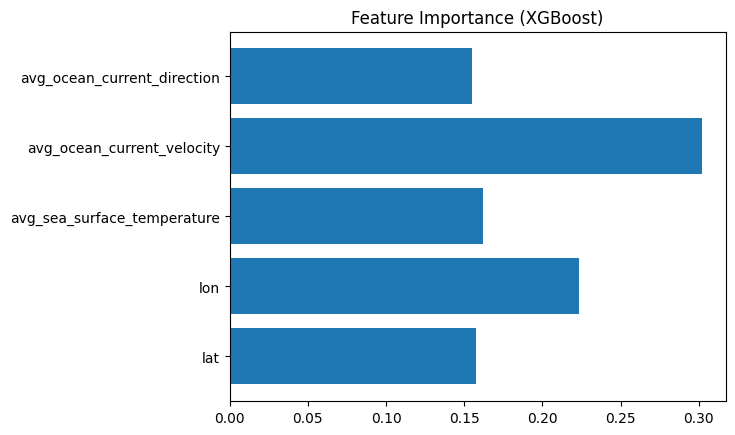

In [25]:
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


X = df[[
    "lat",
    "lon",
    "avg_sea_surface_temperature",
    "avg_ocean_current_velocity",
    "avg_ocean_current_direction"
]]

y = df["sargassum_biomass"]

model = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6)
model.fit(X, y)

# Mostrar importancia
importances = model.feature_importances_
for name, value in zip(X.columns, importances):
    print(name, ":", value)

plt.barh(X.columns, importances)
plt.title("Feature Importance (XGBoost)")
plt.show()


In [26]:
df.corr()["sargassum_biomass"]


,sargassum_biomass
lat,0.022958
lon,0.148439
avg_sea_surface_temperature,0.102082
avg_ocean_current_velocity,0.117192
avg_ocean_current_direction,-0.076023
sargassum_biomass,1.000000


In [28]:

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    mean_absolute_percentage_error
)
y_pred = model.predict(X_test)

# METRICAS
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-9))) * 100

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 1.204953390131149
MSE : 3.140059212825674
RMSE: 1.772021222453522
R2  : 0.9836462915568996


In [32]:
import joblib
import json
# ==============================
# 5. GUARDAR MODELO Y ESCALADOR
# ==============================
joblib.dump(model, "sargassum_xgb_model.pkl")


# ==============================
# 6. GUARDAR CONFIG A JSON
# ==============================
config = {
    "features": [
        "lat",
        "lon",
        "avg_sea_surface_temperature",
        "avg_ocean_current_velocity",
        "avg_ocean_current_direction"
    ],
    "model_type": "XGBRegressor",
    "model_params": {
        "n_estimators": 400,
        "learning_rate": 0.05,
        "max_depth": 6
    },
    "scaler": "StandardScaler",
    "version": "1.0"
}

with open("sargassum_model_config.json", "w") as f:
    json.dump(config, f, indent=4)
